In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [13]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[0]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
data_with_index = df.set_index("Projects")
data_with_index = data_with_index.drop(["ethereumj", "openhab1-addons", "openhab2-addons", "Silence", "docker-client", "riot-android", "zalenium"])
data_with_index.reset_index(inplace=True)
data_with_index.head()

,Projects,Domains,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,MS Access,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,Etcd,MySQL
0,Activiti,automation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,airbyte,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
data_with_index.iloc[: , 2:].sum().sort_values(ascending=False)

MySQL                            88
H2                               62
PostgreSQL                       61
Redis                            52
Oracle                           50
Ehcache                          41
MariaDB                          34
MS SQL Server                    30
MongoDB                          30
SQLite                           25
Elasticsearch                    22
IBM DB2                          20
Hazelcast                        14
Google Cloud Datastore           14
HBase                            13
Cassandra                        13
Solr                             12
DynamoDB                         12
SAP Adaptive Server              12
Hive                             11
Firebase Realtime                10
Informix                          9
Firebird                          8
Google BigQuery                   8
ClickHouse                        7
PostGIS                           6
Memcached                         6
MS Access                   

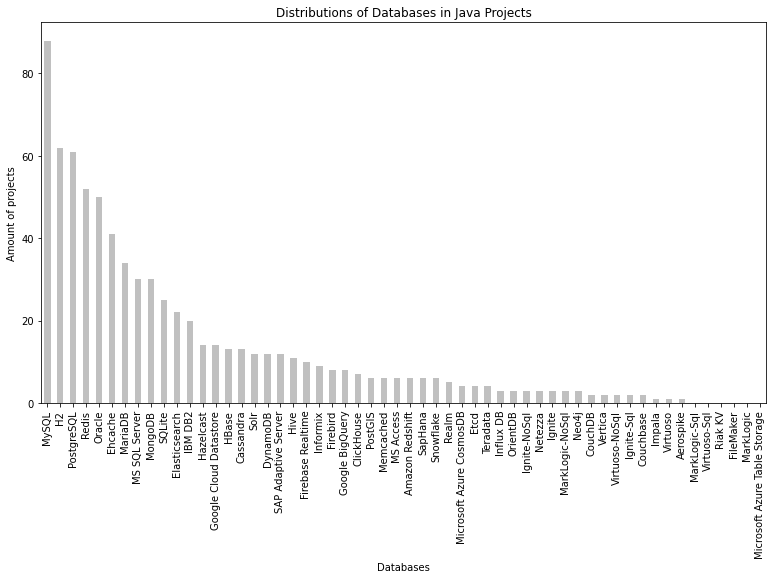

In [15]:
plt.figure(figsize=(13,7))
data_with_index.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', 
                                                        color='silver',
                                                        title="Distributions of Databases in Java Projects")
plt.xlabel("Databases")
plt.ylabel("Amount of projects")
plt.show() 

In [16]:
data_with_index.Domains.value_counts()

software development         74
media                        44
infrastructure management    40
network                      18
game                         18
monitoring                   18
security                     17
hpc                          15
communication                15
program analysis             15
machine learning             12
file management               7
automation                    7
application container         6
operating system              3
collaboration                 3
scm                           2
cryptocurrency                2
gestão pessoal                2
erp                           2
e-commerce                    1
cms                           1
Name: Domains, dtype: int64

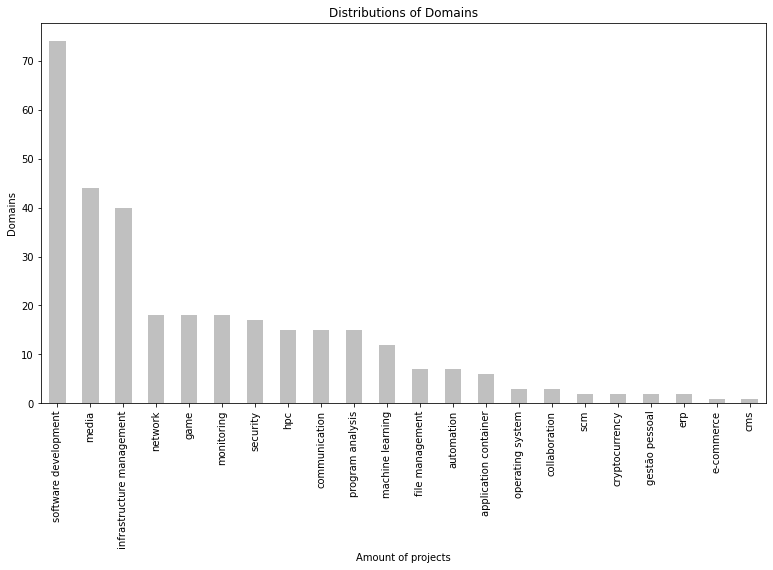

In [17]:
plt.figure(figsize=(13,7))
data_with_index.Domains.value_counts().plot(kind='bar', color='silver',title = 'Distributions of Domains')
#plt.xlim(0,100)
plt.xlabel("Amount of projects")
plt.ylabel("Domains")
plt.show() 

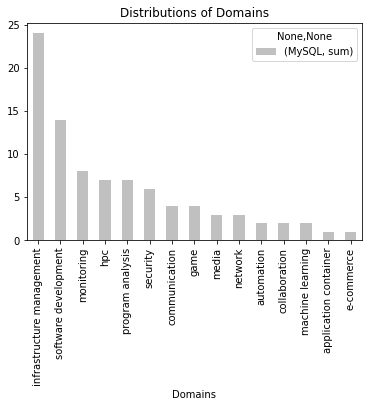

In [18]:
filtered_df = data_with_index.groupby('Domains').agg({'MySQL':['sum']})
filtered_df = filtered_df[filtered_df['MySQL']['sum'] > 0]
result = filtered_df.sort_values(by=('MySQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

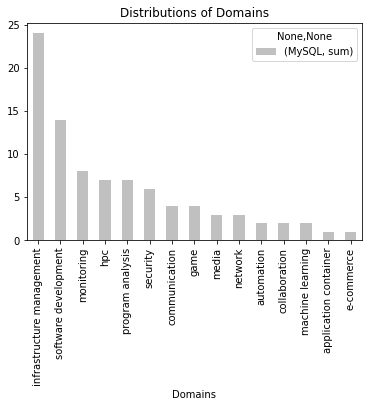

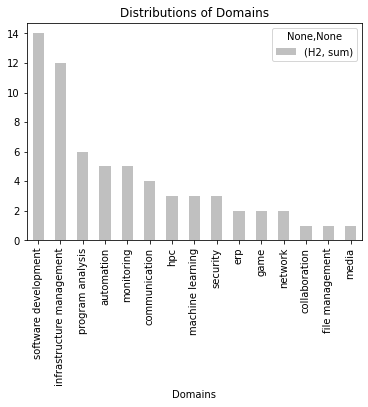

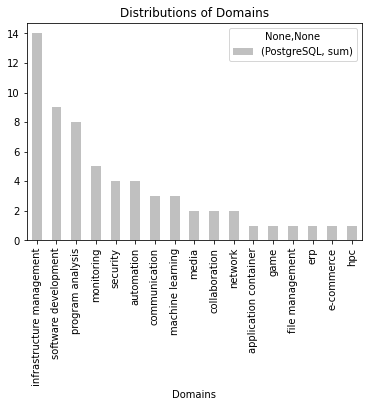

In [19]:
filtered_df = data_with_index.groupby('Domains').agg({'MySQL':['sum']})
filtered_df = filtered_df[filtered_df['MySQL']['sum'] > 0]
result = filtered_df.sort_values(by=('MySQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

filtered_df = df.groupby('Domains').agg({'H2':['sum']})
filtered_df = filtered_df[filtered_df['H2']['sum'] > 0]
result = filtered_df.sort_values(by=('H2','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

filtered_df = df.groupby('Domains').agg({'PostgreSQL':['sum']})
filtered_df = filtered_df[filtered_df['PostgreSQL']['sum'] > 0]
result = filtered_df.sort_values(by=('PostgreSQL','sum'), ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')

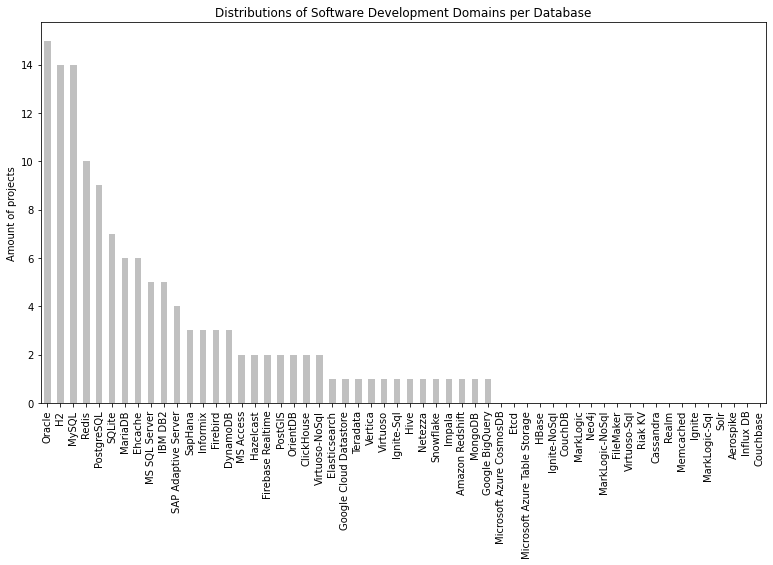

Text(0, 0.5, 'Amount of projects')

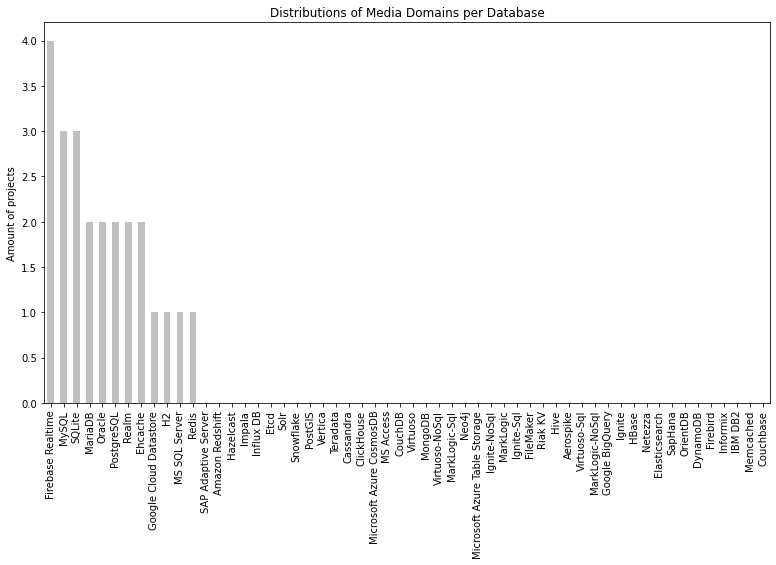

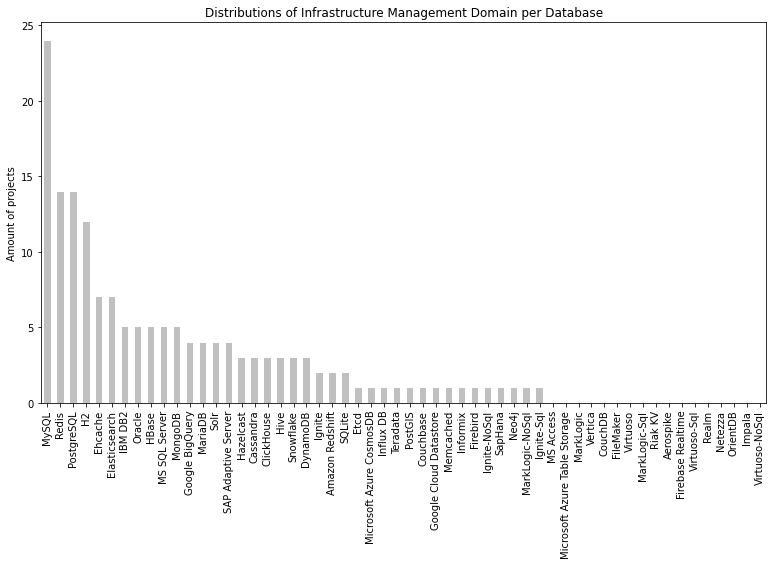

In [20]:
plt.figure(figsize=(13,7))
df_software_development = data_with_index[data_with_index.Domains =='software development'].sum()
df_software_development = df_software_development.iloc[2:].sort_values(ascending=False)
df_software_development.plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Software Development Domains per Database")
plt.ylabel("Amount of projects")
plt.show() 

plt.figure(figsize=(13,7))
df_software_development = data_with_index[data_with_index.Domains =='media'].sum()
#print(df_software_development.iloc[2:].sort_values(ascending=False))
df_software_development.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver', title = 'Distributions of Domains')
plt.title("Distributions of Media Domains per Database")
plt.ylabel("Amount of projects")
#plt.show() 

plt.figure(figsize=(13,7))
df_software_development = data_with_index[data_with_index.Domains =='infrastructure management'].sum()
df_software_development.iloc[2:].sort_values(ascending=False).plot(kind='bar', color='silver',title = 'Distributions of Domains')
plt.title("Distributions of Infrastructure Management Domain per Database")
plt.ylabel("Amount of projects")
#plt.show()

In [21]:
data_with_index.loc[:,'SumPerProject'] = df.sum(axis=1)
data_with_index.head()

<ipython-input-21-1105db92e637>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_with_index.loc[:,'SumPerProject'] = df.sum(axis=1)


,Projects,Domains,Virtuoso-NoSql,Memcached,Microsoft Azure Table Storage,Ignite-NoSql,MarkLogic,Ignite-Sql,FileMaker,Riak KV,...,Virtuoso,SAP Adaptive Server,CouchDB,ClickHouse,Vertica,Teradata,PostGIS,Etcd,MySQL,SumPerProject
0,Activiti,automation,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,airbyte,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,10
2,airsonic,media,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,spring-cloud-alibaba,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,nacos,infrastructure management,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


<AxesSubplot:title={'center':'Amount of differents databases per projects'}>

<Figure size 7200x1440 with 0 Axes>

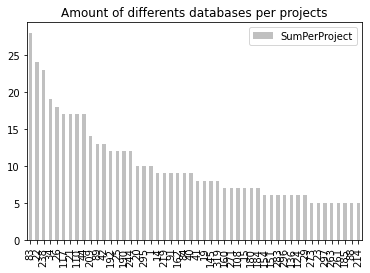

In [22]:
plt.figure(figsize=(100,20))
new_df = data_with_index.loc[:, ['Projects', 'SumPerProject']]
new_df = new_df.sort_values(by='SumPerProject', ascending=False)
new_df.iloc[:50, :].plot(kind='bar', color='silver', title = 'Amount of differents databases per projects')